# Report

## Comparative Report between British Airways and competing airlines of 3 BA Most Profitable Routes. 

### Introduction

In this analysis, we aim to compare British Airways (BA) with its main competitors on three popular international routes: JFK, Dubai, and Hong Kong, based on 2022 data. The identified main competitors for these routes are American Airlines, Emirati Airline, and Cathay Pacific Airlines. To ensure a uniform analysis, I decide to only take into account the economy class reviews.

### Identified Metrics

Two key metrics will be considered in this comparative analysis:

1. **Customer Service Comments and Quantifiable Rating:**
   - We will analyze customer reviews and ratings related to customer service. This will involve considering both qualitative comments and quantifiable ratings provided by passengers.

2. **Pricing:**
   - The pricing strategy of each airline will be assessed. This includes examining the affordability and value for money perceived by customers.

### Review Limitations and Caveats

It's crucial to acknowledge and address potential biases and limitations in the review data:

1. **Negativity Bias:**
   - Recognize that dissatisfied customers may be more inclined to leave reviews. This negativity bias could skew the representation of the overall customer experience. To mitigate this, we will attempt to extract insights from a diverse range of reviews.

2. **Incomplete Representation:**
   - Acknowledge that online reviews may not provide a comprehensive view of the passenger experience. Some satisfied customers may not leave reviews, leading to an incomplete representation. We will attempt to account for this limitation by considering multiple sources and trends over time.

### Analysis Approach

To conduct the analysis, we will:

1. **Collect Data:**
   - Gather customer reviews and ratings for each airline on the specified routes, focusing on the years 2022-2023.

2. **Segmentation:**
   - Segment the data based on airlines, routes, and travel years to facilitate a detailed and targeted analysis.

3. **Quantitative Analysis:**
   - Conduct a quantitative analysis of the quantifiable ratings to identify trends and patterns in customer satisfaction.

4. **NLP Analysis:**
   - Utilize Natural Language Processing (NLP) techniques, including stemming, to analyze and make sense of qualitative comments. This will help extract key themes and sentiments from customer feedback.

5. **Correlation Analysis:**
   - Explore the correlation between quantifiable ratings and the sentiments expressed in comments. This will provide a deeper understanding of how numerical ratings align with qualitative feedback, representing the comments with the quantifiable metrics

By approaching the analysis systematically and considering potential biases, we aim to provide a comprehensive and insightful comparison of British Airways and its competitors on the specified routes.


### **Step 1 & 2**

In [61]:
# Import necessary modules
import requests
from bs4 import BeautifulSoup
import pandas as pd

First, we need to scrape British Airways review data and their comment posted in the Skystrax platform.
the data will be divided into:
1. Name (string)
2. Type of seat flown (categorical)
3. Routes taken (string)
4. Date flown (datetime)
5. Comment (string)

In [62]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/"
pages = 15
page_size = 200

df = pd.DataFrame()

for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    
    # Find all <td> tags with class "review-rating-header cabin_flown"
    td_tags_name=parsed_content.find_all("span", itemprop="name")
    td_tags_cabin_flown = parsed_content.find_all('td', class_='review-rating-header cabin_flown')
    td_tags_route=parsed_content.find_all("td", class_="review-rating-header route")
    td_tags_traveller=parsed_content.find_all("td", class_="review-rating-header type_of_traveller")
    td_tags_date=parsed_content.find_all("td", class_="review-rating-header date_flown")
    td_text_context=parsed_content.find_all("div", {"class": "text_content"})
    td_tags_recommend = parsed_content.find_all("td", class_="review-rating-header recommended")
    
    for index, tag_name in enumerate(td_tags_name):
        name=tag_name.text.strip()
        df.at[index, "Name"]= name

    for index, td_element in enumerate(td_tags_cabin_flown):
        # Handle td_tags_cabin_flown
        seat_type_td_tag = td_element.find_next_sibling('td', class_='review-value')
        seat_type = seat_type_td_tag.text.strip()
        df.at[index, "Seat Type"] = seat_type

    for index, td_element in enumerate(td_tags_route):
        # Handle td_tags_route
        route_td_tag = td_element.find_next_sibling("td", class_="review-value")
        route = route_td_tag.text.strip()
        df.at[index, "Route"] = route

    for index, td_element in enumerate(td_tags_traveller):
        traveller_td_tag = td_element.find_next_sibling("td", class_="review-value")
        traveller_type = traveller_td_tag.text.strip()
        df.at[index, "Type of Traveller"] = traveller_type

    for index, td_element in enumerate(td_tags_date):
        date_td_tag = td_element.find_next_sibling("td", class_="review-value")
        date_flown = date_td_tag.text.strip()
        df.at[index, "Date flown"] = date_flown
            
    for index, td_elem in enumerate (td_tags_recommend):
        recommendation_val_elem = td_elem.find_next_sibling("td", class_="review-value")
        if "rating-no" in recommendation_val_elem["class"]:
            df.at[index, "Reccomend"]= True
        else:
            df.at[index, "Reccomend"]= False

    
    for index, text in enumerate(td_text_context):
        df.at[index, "Comment"] = text.get_text()
            

    

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15


In [63]:
print(df)

                  Name        Seat Type                         Route  \
0        Roger Tilling   Business Class                    LHR to PEK   
1    Jeremy Ferendinos    Economy Class  Cape Town to London Heathrow   
2           Jeremy Fry   Business Class        London to New York JFK   
3        Alan Thompson   Business Class   Glasgow to New York via LHR   
4         Susan Dennis   Business Class      Heathrow to Johannesburg   
..                 ...              ...                           ...   
195  Conrad Winchester    Economy Class     JFK to Manchester via LHR   
196          Sean Kyte  Premium Economy          Gatwick to Barcelona   
197            D Evans    Economy Class                  Dubai to LHR   
198        George Ling  Premium Economy                Rome to London   
199       Peter Gordon      First Class             Bangkok to London   

    Type of Traveller      Date flown Reccomend  \
0            Business     August 2015      True   
1      Family Leisure

In [64]:
i=0
lst=[]
for route in df["Route"]:
    s=""
    for r in route:
        if r == "-":
            r= " to "
        s+=r
    lst.append(s)
df["Route"]=lst


In [65]:
s=df["Route"]
depart=[]
destin=[]
for route in s:
    r=route.split(" to ")
    depart.append(r[0])
    destin.append(r[:-1])
df["Departure"]=depart
df["Destination"]=destin    

In [66]:
#format the datetime from string into an actual datetime
df["Date flown"] = pd.to_datetime(df["Date flown"], format="%B %Y")
df.sort_values(by="Date flown", ascending=True)
new_column_order = ['Name', 'Seat Type', 'Type of Traveller', 'Date flown', 'Reccomend', 'Departure', 'Destination', 'Comment']
df = df[new_column_order]
df


,Name,Seat Type,Type of Traveller,Date flown,Reccomend,Departure,Destination,Comment
0,Roger Tilling,Business Class,Business,2015-08-01,True,LHR,[LHR],British Airways flight was delayed due to a fu...
1,Jeremy Ferendinos,Economy Class,Family Leisure,2015-08-01,True,Cape Town,[Cape Town],"Absolutely disgusted, delayed by 45 min with n..."
2,Jeremy Fry,Business Class,Business,2015-09-01,True,London,[London],London to New York JFK is the most profitable ...
3,Alan Thompson,Business Class,Couple Leisure,2015-08-01,True,Glasgow,[Glasgow],Compared to the likes of EVA Air or Qatar Airw...
4,Susan Dennis,Business Class,Couple Leisure,2015-08-01,False,Heathrow,[Heathrow],Excellent British Airways flight from Heathrow...
...,...,...,...,...,...,...,...,...
195,Conrad Winchester,Economy Class,Family Leisure,2015-08-01,True,JFK,[JFK],BA006 19th May 2015. Awful premium economy ser...
196,Sean Kyte,Premium Economy,Business,2015-09-01,False,Gatwick,[Gatwick],Flew Eurotraveller Heathrow to Athens and back...
197,D Evans,Economy Class,Solo Leisure,2015-09-01,True,Dubai,[Dubai],Flew from Heathrow to San Francisco on May 1st...
198,George Ling,Premium Economy,Couple Leisure,2015-08-01,True,Rome,[Rome],Flew to Tampa from Gatwick on the 12/5/15 retu...


# Quantative Analysis
We need to do some simple quantitive analysis based on the integer data we already have and visualize it using graphs appropriate for the situation.

In [67]:
import matplotlib.pyplot as plt

In [68]:
df["Name"].value_counts()

A Ray                 5
James Williamson      4
Clive Drake           4
Bob Motto             4
John Duffus           3
                     ..
Steve Pilibbossian    1
Steve Gatenby         1
A Ahmed               1
J Harrison            1
Marcus Hoellrich      1
Name: Name, Length: 169, dtype: int64

In [69]:
#count how many review for the month & year they flown
df["Date flown"].value_counts()

2015-08-01    68
2015-07-01    53
2015-06-01    38
2015-05-01    15
2015-09-01    14
2015-04-01     3
2014-09-01     2
2014-11-01     2
2014-07-01     1
2014-08-01     1
2014-10-01     1
2015-03-01     1
2014-12-01     1
Name: Date flown, dtype: int64

In [70]:
#count how many reviewer reccomend British Airline
df["Reccomend"].value_counts()

True     112
False     88
Name: Reccomend, dtype: int64

#### Reccomended and Date Flown
Analyze the reccomendation and compared it with when the reviewer take the flight.
By doing this, we can recognize in which month reviewer travelled the most for 13 months between 2015-2016. We can see the correlation between the number of traveller with good review or reccomended and bad review or not reccomended.

In [71]:
group_reccom_date = df.groupby(pd.Grouper(key="Date flown"))["Reccomend"].value_counts()

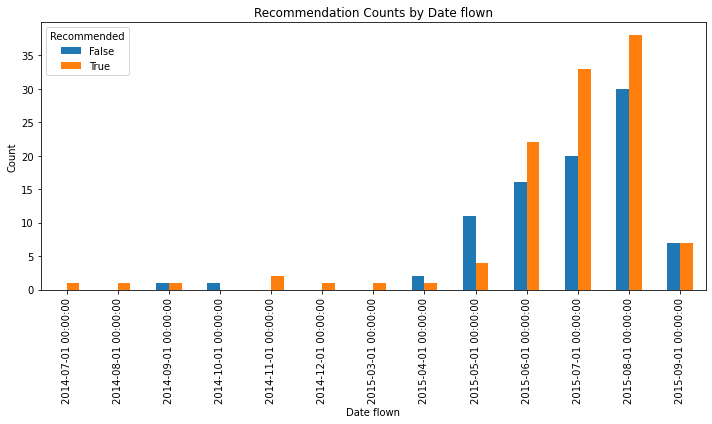

In [72]:
group_reccom_date = group_reccom_date.reset_index(name='count')
# Pivot the DataFrame
pivot_df = group_reccom_date.pivot(index='Date flown', columns='Reccomend', values='count').fillna(0)

# Plotting
pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6))



# Adding labels and title
plt.xlabel('Date flown')
plt.ylabel('Count')
plt.title('Recommendation Counts by Date flown')

# Show plot
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Recommended')
plt.show()

We can see from this bar plot we can see that in the year 2015-2016, the amount of passenger and review start to ramp up in May and peaking at August 2016,
the more reviewer don't reccomend British Airways, this may can indicate as quantity increased, the level of service decrease, edning up with amount of not reccomended boolean increase eventhough the staff can picked it up and increase the level of overall service, resuting in the outcome of True more than False when peaking in August.

#### Seat Type and Type of Traveller

In [73]:
df["Seat Type"].value_counts()

Economy Class      102
Business Class      74
First Class         14
Premium Economy     10
Name: Seat Type, dtype: int64

In [74]:
df["Type of Traveller"].value_counts()

Couple Leisure    55
Solo Leisure      54
Business          51
Family Leisure    40
Name: Type of Traveller, dtype: int64

In [75]:
group= df.groupby(['Type of Traveller', 'Seat Type']).size()

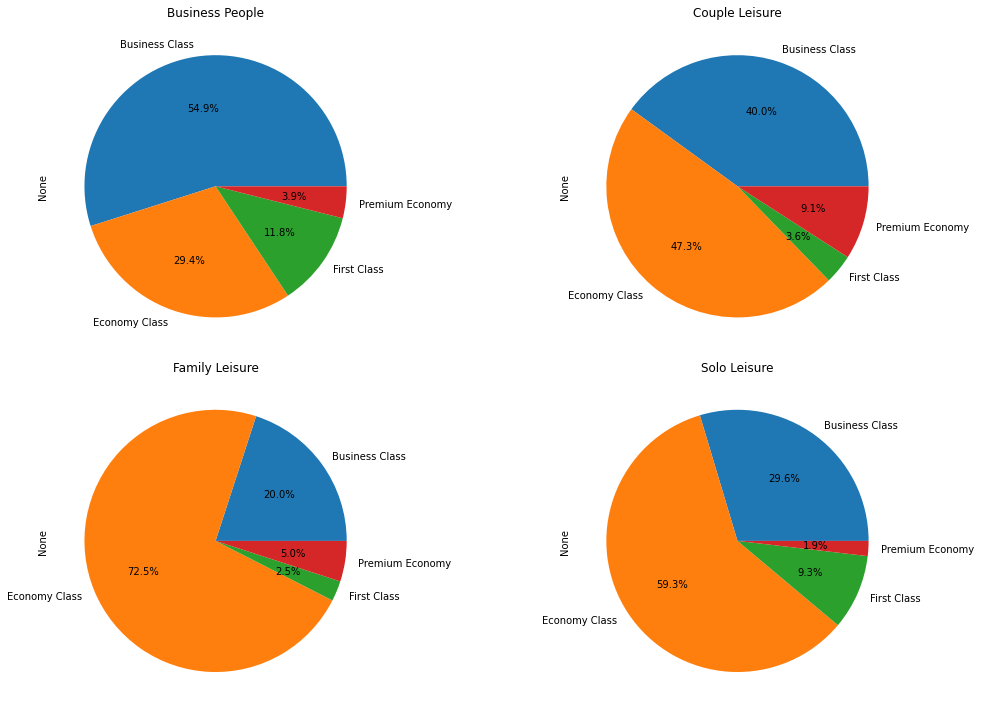

Type of Traveller  Seat Type      
Business           Business Class     28
                   Economy Class      15
                   First Class         6
                   Premium Economy     2
Couple Leisure     Business Class     22
                   Economy Class      26
                   First Class         2
                   Premium Economy     5
Family Leisure     Business Class      8
                   Economy Class      29
                   First Class         1
                   Premium Economy     2
Solo Leisure       Business Class     16
                   Economy Class      32
                   First Class         5
                   Premium Economy     1
dtype: int64

In [76]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Business People pie
group["Business"].plot(kind="pie", autopct='%1.1f%%', ax=axes[0, 0])
axes[0, 0].set_title("Business People")

# Couple Leisure pie
group["Couple Leisure"].plot(kind="pie", autopct='%1.1f%%', ax=axes[0, 1])
axes[0, 1].set_title("Couple Leisure")

# Family Leisure pie
group["Family Leisure"].plot(kind="pie", autopct='%1.1f%%', ax=axes[1, 0])
axes[1, 0].set_title("Family Leisure")

# Solo Leisure pie
group["Solo Leisure"].plot(kind="pie", autopct='%1.1f%%', ax=axes[1, 1])
axes[1, 1].set_title("Solo Leisure")

plt.tight_layout()
plt.show()

group


From this analysis, we can say that based on the type of traveller quite have an affect on type of seat they going to get. A business person way more likely to pick pricier business class as their choice, with around 55% of business person reviewer pick business class, while on the other end, family leisure are more likely to pick economy class. Couple leisure reviewer are thinly split between Business class (40%) and Economy class (47%). Most solo leisure user will take Economy class (60%).

### Seat Type and Reccomendation

In [79]:
df["Seat Type"].value_counts()

Economy Class      102
Business Class      74
First Class         14
Premium Economy     10
Name: Seat Type, dtype: int64

In [78]:
df["Reccomend"].value_counts()

True     112
False     88
Name: Reccomend, dtype: int64